# Breast modeling
## From Huang2011 - the breast profile were plotted in inverse order axis

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.io as sio

In [2]:
#breast length
hA = 5.7#+-0.5
hB = 7.1#+-0.3
hC = 9.4#+-0.2
hD = 9.7#+-0.2

In [3]:
# cup A
a1 = -11.014
b1 = 13.281
def profileCupA(z):
    return (a1*z**3 + b1*z**2 - 11.215*z + 11.604)/2

In [4]:
# cup B
a2 = -13.933
b2 = 15.824
def profileCupB(z):
    return (a2*z**3 + b2*z**2 - 10.937*z + 11.933)/2

In [5]:
a3 = -20.452
b3 = 24.397
def profileCupC(z):
    return (a3*z**3 + b3*z**2 -13.686*z + 13.585)/2

In [6]:
a4 = -17.652
b4 = 20.909
def profileCupD(z):
    return (a4*z**3 + b4*z**2 - 10.949*z + 14.205)/2

In [7]:
n = 100
z = np.linspace(0.05, 1, n)
deffA = profileCupA(z)
deffB = profileCupB(z)
deffC = profileCupC(z)
deffD = profileCupD(z)

In [8]:
#Aproach 1 : ddy = 0
zdd0 = 13.281*2/(11.014*6)#second derivative == 0
deff = profileCupA(zdd0)#evaluate this z value
m11 = (deff-profileCupA(0))/zdd0#find straight line step
#Aproach 2 : tangent functions 
z1 = -b1/(2*a1)
z2 = -b2/(2*a2)
z3 = -b3/(2*a3)
z4 = -b4/(2*a4)

In [9]:
def dProfileCupA(z):
    return (-11.014*3*z**2 + 13.281*2*z - 11.215)/2
m1 = dProfileCupA(z1)
def profileHolderA(z):
    return m1*z + profileCupA(0)

In [10]:
def dProfileCupB(z):
    return (-13.933*3*z**2 + 15.824*2*z - 10.937)/2
m2 = dProfileCupB(z2)
def profileHolderB(z):
    return m2*z + profileCupB(0)

In [11]:
#profile for breast holder
def dProfileCupC(z):
    return (-20.452*3*z**2 + 24.397*2*z - 13.686)/2
m3 = dProfileCupC(z3)
def profileHolderC(z):
    return m3*z + profileCupC(0)

In [12]:
def dProfileCupD(z):
    return (-17.652*3*z**2 + 20.909*2*z - 10.949)/2
m4 = dProfileCupD(z4)
def profileHolderD(z):
    return m4*z + profileCupD(0)

In [13]:
def plotearMama(breastProfile,z,point1,point2):
    x = [point1[0],point2[0]]
    y = [point1[1],point2[1]]
    plt.plot(breastProfile,z,label='Perfil f(z)',linewidth=2,color='m',dash_capstyle='round')
    plt.plot(-1*breastProfile,z,'m-.',label="Perfil -f(z)",linewidth=2,dash_capstyle='round')
    plt.plot(y,x,label='Base del pezón',linewidth=1,color='m',ls=('dashed'))#inverse order for plotting
    plt.xlabel('Radio de mama f(z) (cm)') 
    plt.ylabel('Altura relativa z')   

In [14]:
def plotearTorax(point1,point2):
    x = [point1[0],point2[0]]
    y = [point1[1],point2[1]]
    plt.plot(y,x,label='Pared Toráxica',color='k',ls=('dashed'))#inverse order for plotting

In [15]:
def plotearHolder(point1,point2,point3,point4):
    #x = [point1[0],point2[0],point3[0],point4[0]]
    #y = [point1[1],point2[1],point3[1],point4[1]]
    #plt.plot(y,x,label='Perfil de Sujetador',linewidth=1,color='blue')
    plt.plot([point1[1],point2[1]],[point1[0],point2[0]],'bo--',label='Recta y(z)',linewidth=1)
    plt.plot([point4[1],point3[1]],[point4[0],point3[0]],'ro-.',label='Recta -y(z)',linewidth=1)
    plt.plot([point2[1],point3[1]],[point2[0],point3[0]],'co-',label='Recta z=1',linewidth=1)
    plt.plot([point1[1],point4[1]],[point1[0],point4[0]],'ko', linestyle=(0, (5, 1, 5, 3)),label='Recta z=0.05',linewidth=1)

In [16]:
pA1 = [0.05,profileHolderA(0.05)]#cup A breast point
pA2 = [1,profileHolderA(1)]
pA3 = [0.05,-profileHolderA(0.05)]
pA4 = [1,-profileHolderA(1)]


In [17]:
pB1 = [0.05,profileHolderB(0.05)]
pB2 = [1,profileHolderB(1)]
pB3 = [0.05,-profileHolderB(0.05)]
pB4 = [1,-profileHolderB(1)]

In [18]:
pC1 = [0.05,profileHolderC(0.05)]
pC2 = [1,profileHolderC(1)]
pC3 = [0.05,-profileHolderC(0.05)]
pC4 = [1,-profileHolderC(1)]

In [19]:
pD1 = [0.05,profileHolderD(0.05)]
pD2 = [1,profileHolderD(1)]
pD3 = [0.05,-profileHolderD(0.05)]
pD4 = [1,-profileHolderD(1)]

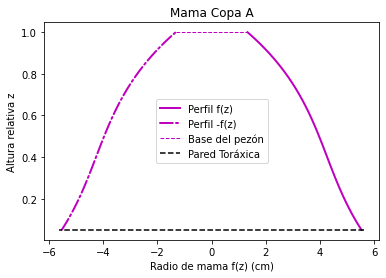

In [20]:
plotearMama(deffA,z,[1,-profileCupA(1)],[1,profileCupA(1)])
plotearTorax(pA1,pA3)
plt.title('Mama Copa A')
plt.legend()
plt.show()

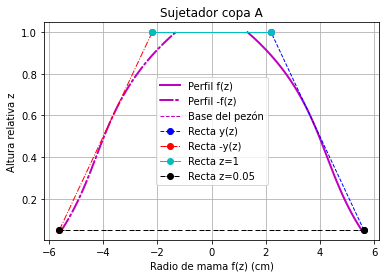

In [21]:
plotearMama(deffA,z,[1,-profileCupA(1)],[1,profileCupA(1)])
plotearHolder(pA1,pA2,pA4,pA3)
plt.title('Sujetador copa A')
plt.legend()
plt.grid(True)
plt.show()

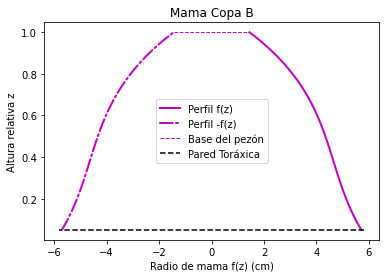

In [22]:
plotearMama(deffB,z,[1,-profileCupB(1)],[1,profileCupB(1)])
plotearTorax(pB1,pB3)
plt.title('Mama Copa B')
plt.legend()
plt.show()

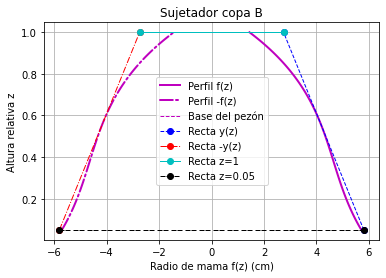

In [23]:
plotearMama(deffB,z,[1,-profileCupB(1)],[1,profileCupB(1)])
plotearHolder(pB1,pB2,pB4,pB3)
plt.title('Sujetador copa B')
plt.legend()
plt.grid(True)
plt.show()

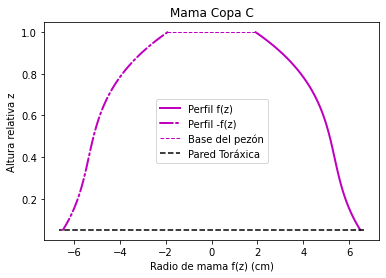

In [24]:
plotearMama(deffC,z,[1,-profileCupC(1)],[1,profileCupC(1)])
plotearTorax(pC1,pC3)
plt.title('Mama Copa C')
plt.legend()
plt.show()

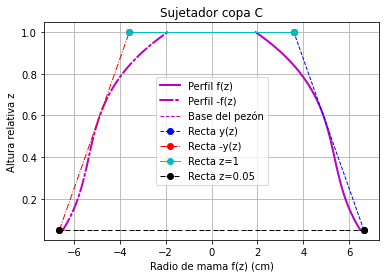

In [25]:
plotearMama(deffC,z,[1,-profileCupC(1)],[1,profileCupC(1)])
plotearHolder(pC1,pC2,pC4,pC3)
plt.title('Sujetador copa C')
plt.grid(True)
plt.legend()
plt.show()

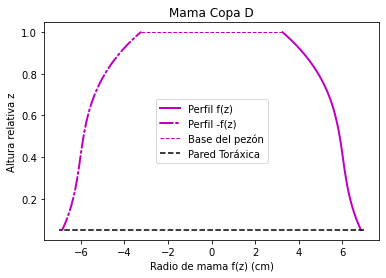

In [26]:
plotearMama(deffD,z,[1,-profileCupD(1)],[1,profileCupD(1)])
plotearTorax(pD1,pD3)
plt.title('Mama Copa D')
plt.legend()
plt.show()

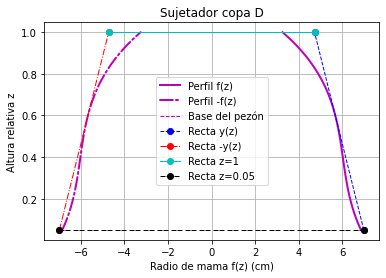

In [27]:
plotearMama(deffD,z,[1,-profileCupD(1)],[1,profileCupD(1)])
plotearHolder(pD1,pD2,pD4,pD3)
plt.title('Sujetador copa D')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
rH_A=round(profileHolderA(0.05),2)
rL_A=round(profileHolderA(1),2)
rH_B=round(profileHolderB(0.05),2)
rL_B=round(profileHolderB(1),2)
rH_C=round(profileHolderC(0.05),2)
rL_C=round(profileHolderC(1),2)
rH_D=round(profileHolderD(0.05),2)
rL_D=round(profileHolderD(1),2)

In [31]:
print(rH_A,rH_B,rH_C,rH_D)

5.62 5.81 6.63 6.98


In [29]:
#print(rH_A,rL_A)
print(hA,hB,hC,hD)

5.7 7.1 9.4 9.7


In [30]:
#breastR = np.array([rH_A,rL_A, rH_B,rL_B, rH_C,rL_C, rH_D,rL_D])
#breastH = np.array([hA,hB,hC,hD])
#sio.savemat('breastHolderData.mat', mdict={'breastR':breastR, 'breastH':breastH})